In [1]:
import numpy as np
import matplotlib.pyplot as plt
from generate_placement_data import get_data
from hdimvis.visualise_layouts_and_metrics.plot import show_layouts


In [10]:
parents, parent_hd_distances, sample_ld_pos, r, dims, data, sample, sample_indx, layout = get_data('shuttle')

####################
Fetching the "shuttle" dataset
####################
Dataset loaded
####################
A 2D layout of the "sample" dataset will be created 
using the Chalmers' 1996 algorithm
####################
####################
No metrics will be collected during layout creation. 
To change this use the 'metric collection' parameter of the layout 
####################
####################
You might want to use the "initial layout" parameter of the algorithm
to specify a different initialisation
####################


In [3]:
print(sample_ld_pos.shape)

(240, 2)


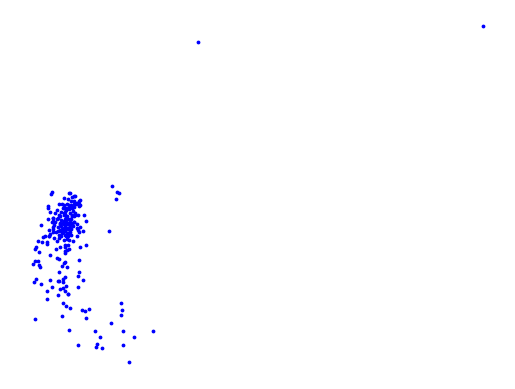

This is the layout (2D embedding) of the sample


In [11]:
show_layouts(layout)
print("This is the layout (2D embedding) of the sample")


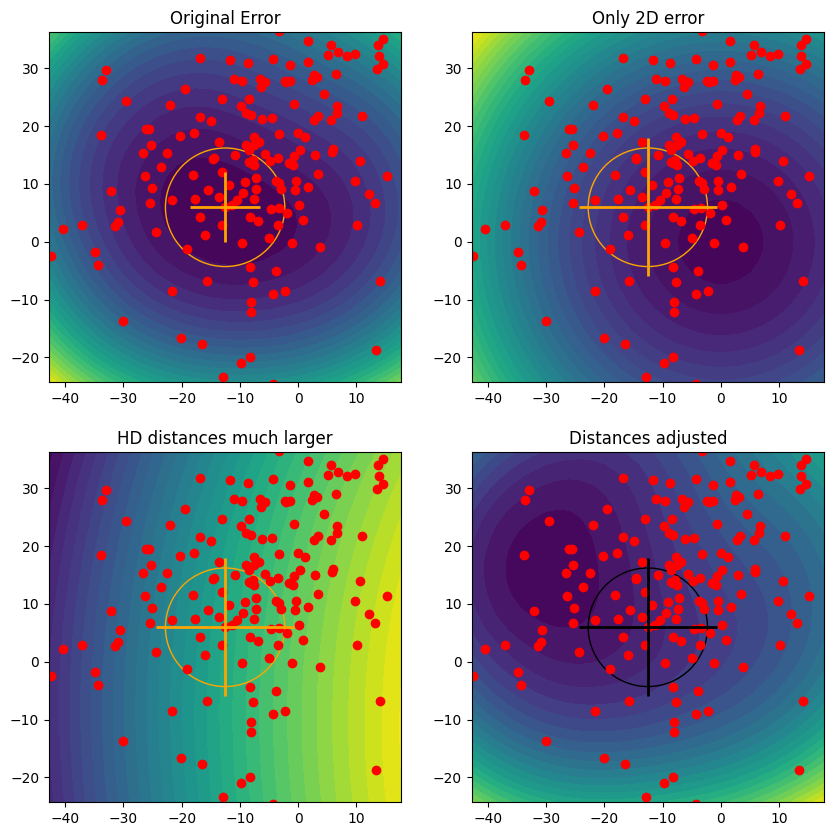

In [34]:
#adjust the size of the plot to include more ore fewer sample points here:
extra_space = 20
#the pint whose parent we will consider:
point_idx = np.random.randint(0, r)

the_point_hd = data[point_idx]
the_parent_indx = parents[point_idx]

radius = parent_hd_distances[point_idx]
the_parent = sample_ld_pos[the_parent_indx]




#calculate the error function
x = np.linspace( the_parent[0] - radius - extra_space, the_parent[0] + radius + extra_space,30)
y = np.linspace( the_parent[1] - radius - extra_space, the_parent[1] + radius + extra_space,30)

grid_size_x = x.size
grid_size_y = y.size

xv, yv = np.meshgrid(x, y)

hd_dist= np.linalg.norm(sample - the_point_hd, axis=1)

ld_dist = np.zeros((grid_size_x,grid_size_y, sample.shape[0]))

for i in range(sample_ld_pos.shape[0]):
    xy =  np.dstack((xv - sample_ld_pos[i, 0], yv - sample_ld_pos[i, 1]))
    distance_one_p = np.linalg.norm(xy, axis=2)
    ld_dist[... ,i] = distance_one_p

diffs = (ld_dist - hd_dist[None, None,:])



#plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 10))
# fig.tight_layout()


#orignal error
original_error = np.sum(diffs**2, axis=2)
circle1 = plt.Circle((the_parent[0], the_parent[1]), radius, color='orange', fill = False)
ax1.contourf(x, y, original_error, levels =30)
ax1.autoscale(False)
ax1.plot(sample_ld_pos[:,0],sample_ld_pos[:,1], 'ro')
ax1.plot(the_parent[0], the_parent[1], color='orange', marker='+', markersize=50, markeredgewidth='2' )
ax1.add_patch(circle1)
ax1.set_title('Original Error')


#just low d error
just_low_d_error = np.sum(ld_dist**2, axis=2)
circle2 = plt.Circle((the_parent[0], the_parent[1]), radius, color='orange', fill = False)
ax2.contourf(x, y, just_low_d_error, levels =30)
ax2.autoscale(False)
ax2.plot(sample_ld_pos[:,0],sample_ld_pos[:,1], 'ro')
ax2.plot(the_parent[0], the_parent[1], color='orange', marker='+', markersize=100, markeredgewidth='2' )
ax2.add_patch(circle2)
ax2.set_title('Only 2D error')

# hd distances much larger than 2d distances
diffs_exaggerated_hd = (ld_dist - hd_dist[None, None,:]**2)
error_exaggerated_hd =  np.sum(diffs_exaggerated_hd**2, axis=2)
circle3 = plt.Circle((the_parent[0], the_parent[1]), radius, color='orange', fill = False)
ax3.contourf(x, y, error_exaggerated_hd, levels =30)
ax3.autoscale(False)
ax3.plot(sample_ld_pos[:,0],sample_ld_pos[:,1], 'ro')
ax3.plot(the_parent[0], the_parent[1], color='orange', marker='+', markersize=100, markeredgewidth='2' )
ax3.add_patch(circle3)
ax3.set_title('HD distances much larger')

diffs_adjusted = (ld_dist - hd_dist[None, None,:]*1.2)
error_adjusted=  np.sum(diffs_adjusted**2, axis=2)
circle4 = plt.Circle((the_parent[0], the_parent[1]), radius, color='black', fill = False)
ax4.contourf(x, y, error_adjusted, levels =30)
ax4.autoscale(False)
ax4.plot(sample_ld_pos[:,0],sample_ld_pos[:,1], 'ro')
ax4.plot(the_parent[0], the_parent[1], color='black', marker='+', markersize=100, markeredgewidth='2' )
ax4.add_patch(circle4)
ax4.set_title('Distances adjusted')


plt.show()